In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [7]:
data = pd.read_csv(os.path.join('data', 'data.csv'))
data

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [84]:
data_Q = data[['Q' + str(i) for i in range(13, 29)]]
data_Q

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


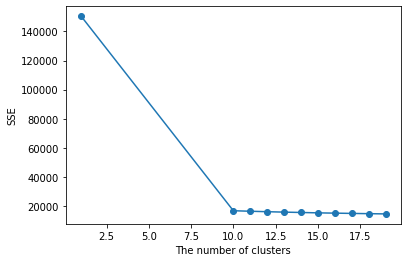

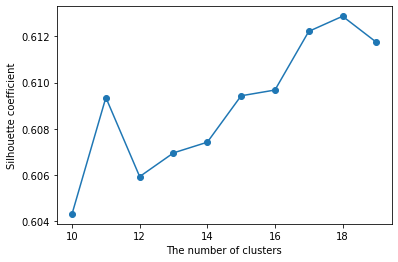

In [89]:
# 记录不同类数的轮廓系数结果
x_label_silhouette_score = []
y_label_silhouette_score = []
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


model = KMeans(n_clusters=1, init='k-means++', n_init=10).fit(data_Q)
# clusterid, error, nfound = kcluster(X, 1, dist='e', method='a', transpose=0)
x_label_SSE = [1]
y_label_SSE = [model.inertia_]
for n_clusters in range(10, 20):
    # 采用基于余弦相似度的聚类
    
    model = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10).fit(data_Q)
    # 计算轮廓系数
    silhouette_avg = silhouette_score(data_Q, model.labels_, metric='euclidean')
    x_label_silhouette_score.append(n_clusters)
    y_label_silhouette_score.append(silhouette_avg)
    x_label_SSE.append(n_clusters)
    y_label_SSE.append(model.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(x_label_SSE, y_label_SSE, marker="o")
plt.xlabel("The number of clusters")
plt.ylabel("SSE")
plt.show()
plt.plot(x_label_silhouette_score, y_label_silhouette_score, marker="o")
plt.xlabel("The number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

In [111]:
model = KMeans(n_clusters=8, init='k-means++', n_init=10).fit(data_Q)
#y_km中保存了聚类的结果
dict={}
for key in model.labels_:
    dict[key]=dict.get(key,0)+1
print(dict)

{2: 1475, 4: 839, 3: 736, 1: 1443, 0: 549, 5: 222, 6: 355, 7: 201}


# PCA可视化
### 二维

In [76]:
pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(data_Q)

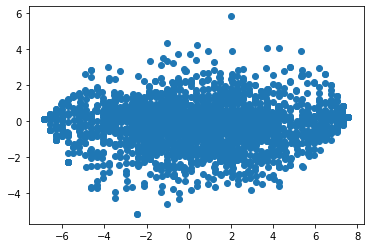

In [77]:
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.show()

### 三维

In [65]:
pca_3 = PCA(n_components=3)
X_pca_3d = pca_3.fit_transform(data_Q)

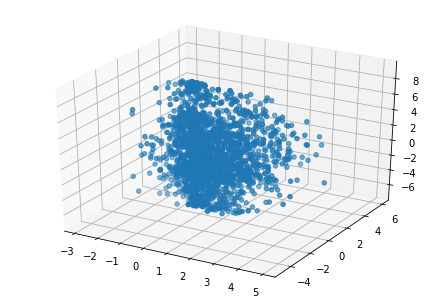

In [66]:
fig = plt.figure()
ax = Axes3D(fig)
t = ax.scatter(X_pca_3d[:, 1], X_pca_3d[:, 2], X_pca_3d[:, 0])

plt.show()

# TSNE可视化
## PCA初始化
### 二维

In [112]:
tsne_2=TSNE(n_components=2, metric='euclidean', init='pca')
X_tnse_2d = tsne_2.fit_transform(data_Q)


# _0 = np.argwhere(model.labels_ == 0)
# _1 = np.argwhere(model.labels_ == 1)
# _2 = np.argwhere(model.labels_ == 2)
# _0 = [c[0] for c in _0]
# _1 = [c[0] for c in _1]
# _2 = [c[0] for c in _2]

# X_tnse_2d_0 = X_tnse_2d[_0]
# X_tnse_2d_1 = X_tnse_2d[_1]
# X_tnse_2d_2 = X_tnse_2d[_2]

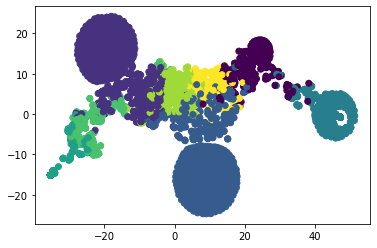

In [113]:
plt.scatter(X_tnse_2d[:, 0], X_tnse_2d[:, 1], c=model.labels_)
plt.show()

### 三维

In [114]:
tsne_3=TSNE(n_components=3, metric='euclidean', init='pca')
X_tnse_3d = tsne_3.fit_transform(data_Q)

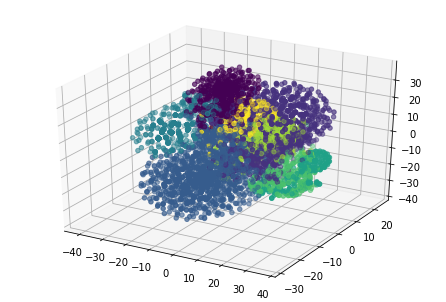

In [122]:
fig = plt.figure()
ax = Axes3D(fig)
t = ax.scatter(X_tnse_3d[:, 0] * -1, X_tnse_3d[:, 2], X_tnse_3d[:, 1], c=model.labels_)

plt.show()

## 随机（random）初始化
### 二维

In [43]:
tsne_2_rdm=TSNE(n_components=2, metric='euclidean', init='random')
X_tnse_2d_rdm = tsne_2_rdm.fit_transform(data_Q)

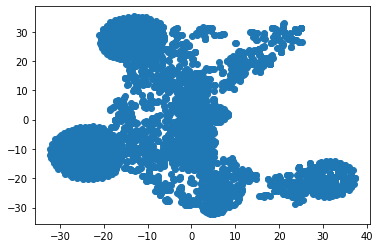

In [47]:
plt.scatter(X_tnse_2d_rdm[:, 1], X_tnse_2d_rdm[:, 0] * -1)
plt.show()

### 三维

In [48]:
tsne_3_rdm=TSNE(n_components=3, metric='euclidean', init='random')
X_tnse_3d_rdm = tsne_3_rdm.fit_transform(data_Q)

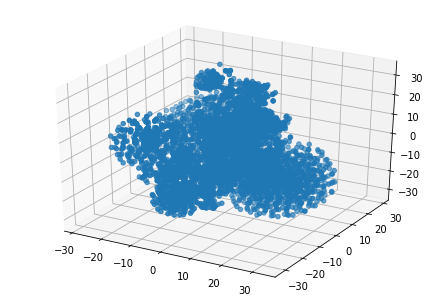

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
t = ax.scatter(X_tnse_3d_rdm[:, 0], X_tnse_3d_rdm[:, 2], X_tnse_3d_rdm[:, 1])

plt.show()

In [61]:
set(list(data['nb.repeat']))

{1, 2, 3}